Step by step guide to create Heart disease prediction using Machine Learning by using Logistic Regression Algorithm and deploy it on Heroku with Flask

Major steps to be followed:

1. Problem statement
2. Data collection
3. Exploratory data analysis
4. Feature Engineering
5. Feature Selection
6. Machine Learning Model Training
7. Model Testing
8. Deployment of final model on Heroku via Flask

##Problem statement - Heart disease is one of the biggest challenge globally in the healthcare industry. Cardiac arrest causes due to various factors such as obesity, high blood pressure, genetics, age, smoking, stress, family history etc. Considering various factors with available data we will predict chance of heart attack with the help of Machine Learning Algorithm.

From the problem statement, it is a binary classification.

1 - If a person has a chance of getting heart attack

0 - If a person has no chance of getting heart attack

Data Collection - The data used in this project has downloaded from Kaggle

Features details:

1. Age
2. (Sex) Male & Female
3. (cp) chest pain type
4. (trestbps) resting blood pressure 
5. (chol) serum cholesterol in mg/dl
6. (fbs)fasting blood sugar
7. (restecg) resting electrocardiography results
8. (thalach) maximum heart rate achieved 
9. (exang) exercise induced angina
10. (oldpeak) = ST depression induced by exercise relative to rest
11. (slope) of the peak exercise ST segment 
12. (ca) number of major vessels
13. (thal) maximum heart rate achieved


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Exploratary Data Analysis
#Let's try to understand more about the data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#There are no categorical values in the dataset
#Checking null values in the date
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no null values in the data

In [7]:
#Data Visualization

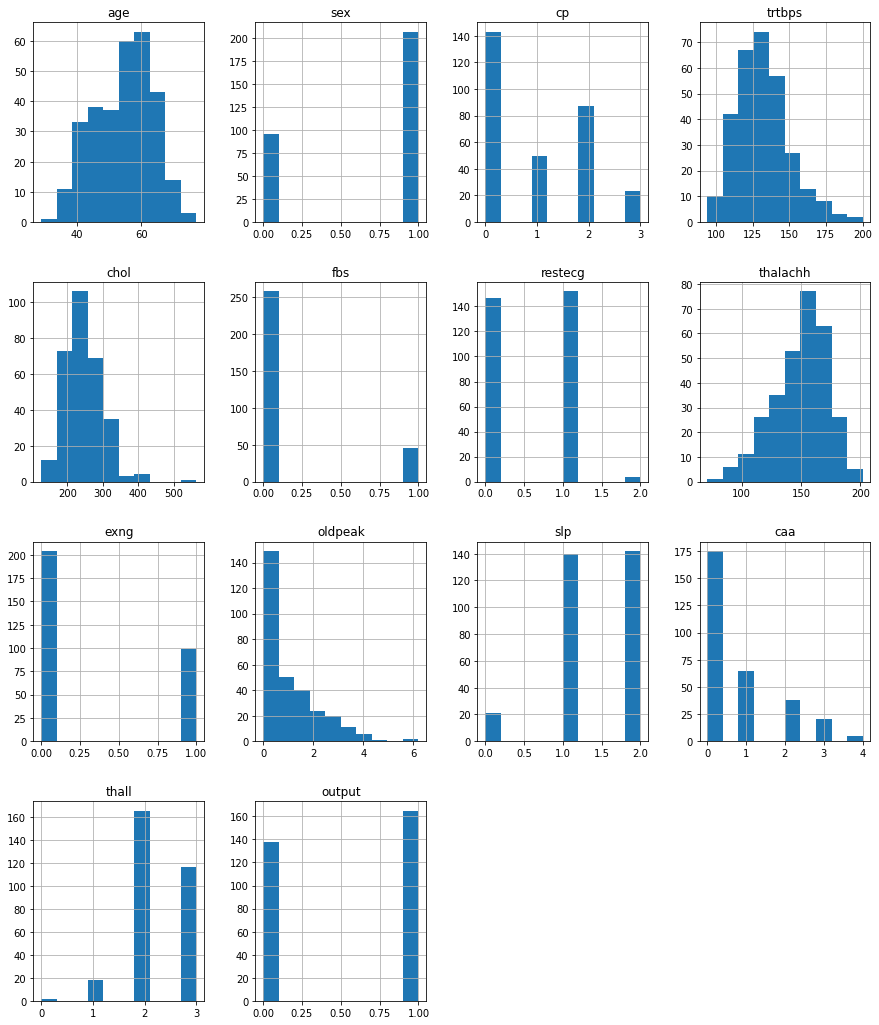

In [8]:
#Check the distribution of each variable
def show_hist(x):
    plt.rcParams["figure.figsize"]=15,18
    x.hist()

show_hist(df)

Few observations from the above histograms:
1. Age, trtbps, chol, thalachh are following normal distribution
2. Rest all variables are not normally distributed

In [9]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

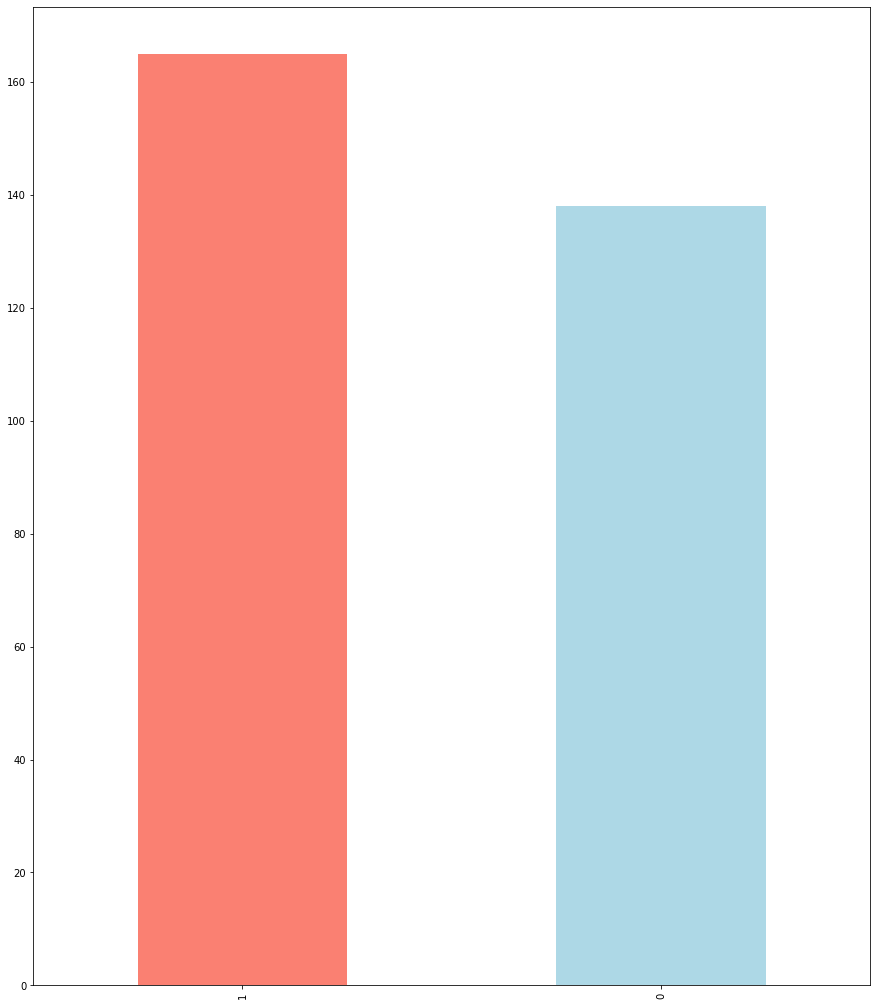

In [10]:
#Check the distribution of output variable
df['output'].value_counts().plot(kind='bar',color=["salmon", "lightblue"])

In [11]:
#From the above plot, we can observe that 165 people have heart disease and 138 people don't have the heart disease. 
#So, our data is a balanced dataset.

In [12]:
#check the unique values in the all variables

In [13]:
categorical_val=[]
continuous_val=[]

for column in df.columns:
    print("===============")
    print(f"{column}:{df[column].unique()}")
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

age:[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex:[1 0]
cp:[3 2 1 0]
trtbps:[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol:[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs:[1 0]
restecg

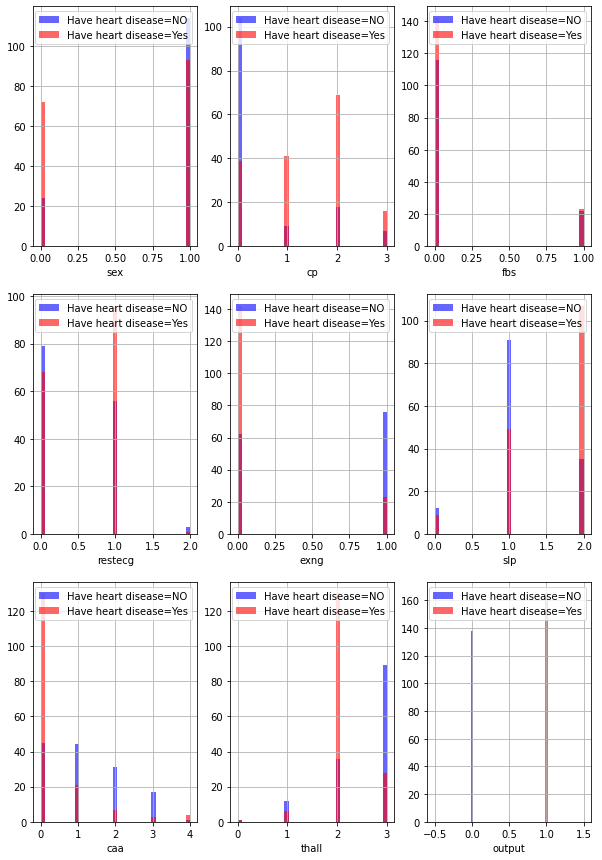

In [14]:
#will check the impact of features on output
plt.figure(figsize=(10,15))

for i, column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df['output']==0][column].hist(bins=35,color='blue',label='Have heart disease=NO',alpha=0.6)
    df[df['output']==1][column].hist(bins=35,color='red',label='Have heart disease=Yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations:
1. Male have heart disease.
2. (cp) People who has chest pain with the values of (1,2,3) are having heart disease.
3. (caa) People with 0 vessels are having heart disease.
4. (exng) People who does not practice execrise regularly, are majorly suffering with heart disease.
5. People with more (thall) stress levels are having heart disease.
6. (restecg) people with value of 1 are more likely to have heart disease.

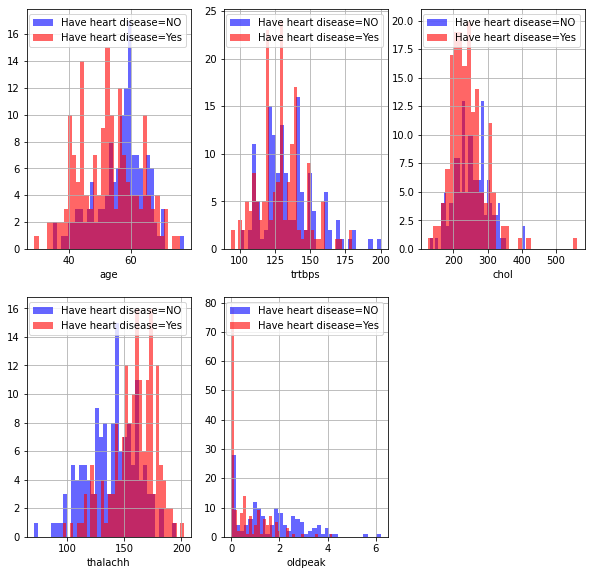

In [15]:
plt.figure(figsize=(10,15))

for i, column in enumerate(continuous_val,1):
    plt.subplot(3,3,i)
    df[df['output']==0][column].hist(bins=35,color='blue',label='Have heart disease=NO',alpha=0.6)
    df[df['output']==1][column].hist(bins=35,color='red',label='Have heart disease=Yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations

1. People between the age of 40 to 58 are majorly suffering with heart disease.
2. People who has having the resting blood pressure of 125-150 have heart disease.
3. Cholestoral levels between 180-280 are the reason for heart disease.
4. When the heart rate achieves maximun between 150-180, its results in cardiac arrest.
5. The old peak of excercise with 0 value, affecting the heart.

In [16]:
#Compare the relation between age and the max heart rate

Text(0.5, 1.0, 'Heart disease in function of Age vs Max Heart rate')

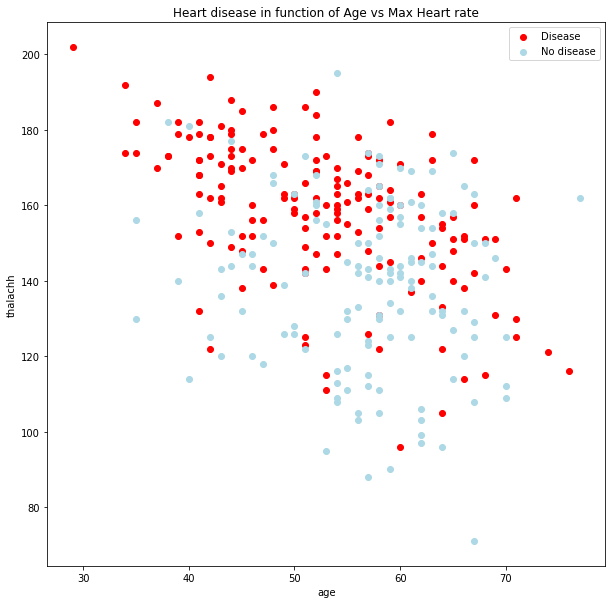

In [17]:
#plot for positive 
plt.figure(figsize=(10,10))
plt.scatter(df.age[df.output==1],df.thalachh[df.output==1],c='red')

#plot for negative 
plt.scatter(df.age[df.output==0],df.thalachh[df.output==0],c='lightblue')

plt.xlabel('age')
plt.ylabel('thalachh')
plt.legend(['Disease','No disease'])
plt.title('Heart disease in function of Age vs Max Heart rate')

<AxesSubplot:>

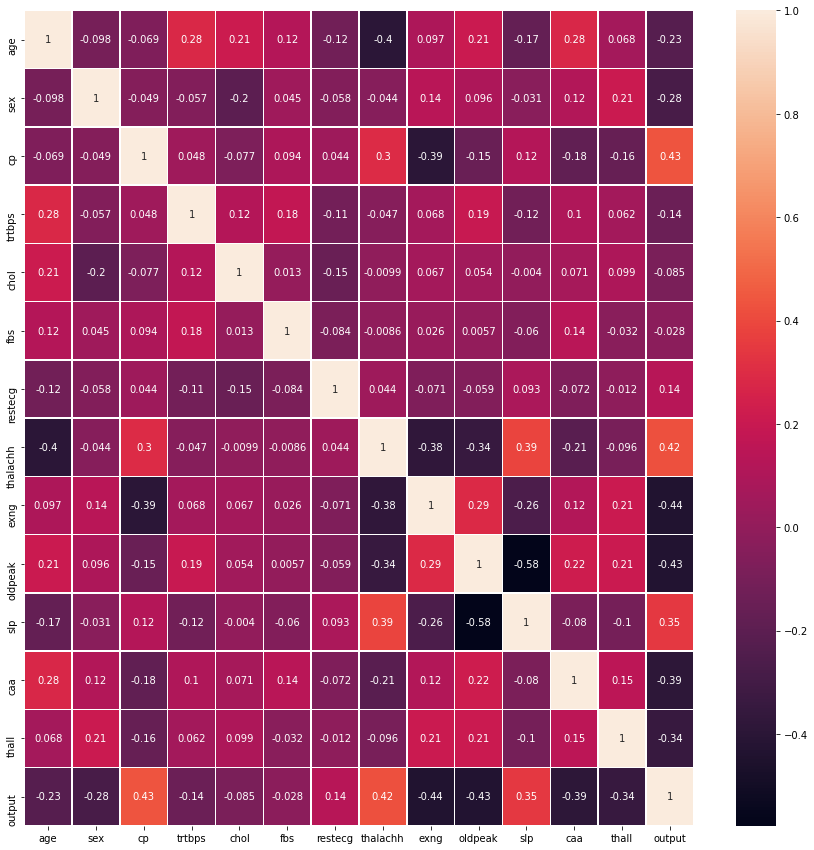

In [18]:
#correlation maxitrx
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix,annot=True,ax=ax,linewidths=0.5)

Observations:

1. Chol and fbs are least correlated with output.
2. cp, thalachh, slp are having maximum correlation with output.
3. Rest all variables are negatively correalted with output, but they are significant.

In [33]:
#will pre-process the continuous variables for better performance

from sklearn.preprocessing import StandardScaler
s_Sc=StandardScaler()
col_to_scale=['age','trtbps','chol','thalachh','oldpeak']
df[col_to_scale]=s_Sc.fit_transform(df[col_to_scale])

In [34]:
#Machine Learning Model Training

In [35]:
#Helper function for printing the classficiation report

In [36]:
from sklearn import *
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")


In [37]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [38]:
#Split thr data into train (70%), test(30%)
from sklearn.model_selection import train_test_split

x=df.iloc[:,0:13]
y=df.iloc[:,13]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [39]:
#Let's train the model
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [40]:
#will print the classification report with the help of print_Score function
print_Score(lr_clf,x_train,x_test,y_train,y_test,train=True)
print_Score(lr_clf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score:84.91%
---------------------------------
Classification Report:
                   0           1  accuracy   macro avg  weighted avg
precision   0.857143    0.843750  0.849057    0.850446      0.849562
recall      0.782609    0.900000  0.849057    0.841304      0.849057
f1-score    0.818182    0.870968  0.849057    0.844575      0.848061
support    92.000000  120.000000  0.849057  212.000000    212.000000
-----------------------------------
Confusion Matrix:
[[ 72  20]
 [ 12 108]]

Test Result:
Accuracy Score:85.71%
---------------------------------
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.902439   0.820000  0.857143   0.861220      0.861672
recall      0.804348   0.911111  0.857143   0.857729      0.857143
f1-score    0.850575   0.863158  0.857143   0.856866      0.856797
support    46.000000  45.000000  0.857143  91.000000     91.000000
---------------------------------
Confusion Matrix:
[[37 

In [41]:
test_score=accuracy_score(y_test,lr_clf.predict(x_test))*100
train_Score=accuracy_score(y_train,lr_clf.predict(x_train))*100

results_df=pd.DataFrame(data=[['Logistic Regression',test_score,train_Score]],columns=['Model','Training Accuracy%','Testing Accuracy%'])

In [42]:
results_df

,Model,Training Accuracy%,Testing Accuracy%
0,Logistic Regression,85.714286,84.90566


In [43]:
import pickle
pickle_out=open('heart.pkl','wb')
pickle.dump(lr_clf,pickle_out)
pickle_out.close()